In [1]:
from pretty_plot import *
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def check_bench(first, second, first_name='true countermodels turned off',
                second_name='true countermodels turned on', bench=10):
    X = 0
    Y = 0
    for i in range(len(first)):
        if first[i] > bench:
            X += 1
            if second[i] < first[i]:
                Y += 1
    print('Of the {} tests which took more than {} seconds to run with {},'.format(X, bench, first_name))
    print('{} were faster with {}.'.format(Y, second_name))

In [3]:
# Process main results
main_results = [
    #'FOSSIL-out-new.txt',
    #'FOSSIL-out-run2.txt',
    'FOSSIL-out-run3.txt',
    'FOSSIL-out-run4.txt',
]
M = len(main_results)
names, results_cex = process_done(main_results[0])
cex = [0] * len(results_cex)
for j,run_results in enumerate(main_results):
    _, results_run = process_done(run_results)
    run = [results_run[name][0] for name in names]
    for i,name in enumerate(names):
        cex[i] += run[i] / M
cex_max = max(cex)

## A. No counterexamples/streaming (runtimes)

In [4]:
# Process comparison
_, results_streaming = process_done('streaming-new.txt', name_terminate=False)
streaming = [results_streaming[name][0] for name in names]

<Figure size 432x288 with 0 Axes>

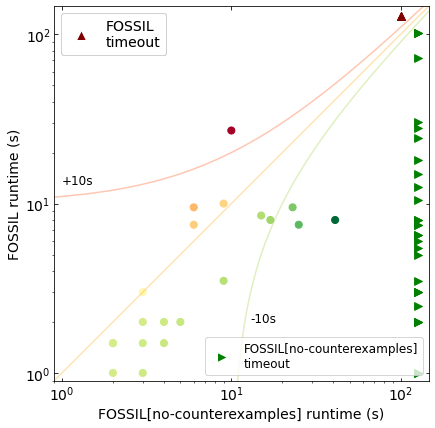

Of the 35 tests which took more than 10 seconds to run with no counterexamples,
32 were faster with main.
Of the 50 tests which took more than -1 seconds to run with no counterexamples,
42 were faster with main.


In [5]:
# Plot
m = 100 #max([max(streaming), cex_max])
x = adjust(streaming, mx=m)
y = adjust(cex, mx=m)
pretty_plot(x, y, x_name='FOSSIL[no-counterexamples]', y_leg='upper left', offset_band_label=True)
check_bench(x, y, first_name='no counterexamples', second_name='main')
check_bench(x, y, first_name='no counterexamples', second_name='main', bench=-1)

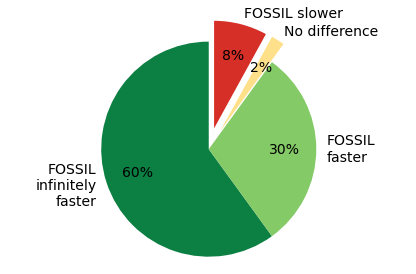

When FOSSIL was faster, it was on average 137.8% faster.
When FOSSIL was slower, it was on average 32.5% slower.


In [6]:
# Pie chart
timeouts = 0
faster = 0
faster_pct = []
equal = 0
slower = 0
slower_pct = []
for i in range(len(x)):
    if x[i] > 100:
        timeouts += 1
    elif x[i] > y[i]:
        faster += 1
        faster_pct.append((x[i]-y[i])/y[i])
    elif x[i] == y[i]:
        equal += 1
    else:
        slower += 1
        slower_pct.append((y[i]-x[i])/y[i])
        
labels = ['FOSSIL\ninfinitely\nfaster', 'FOSSIL\nfaster', 'No difference', 'FOSSIL slower']
sizes = [timeouts, faster, equal, slower]
explode = (0, 0, 0.2, 0.2)
cmap = cm.get_cmap('RdYlGn')
colors = [cmap(0.95), cmap(0.75), cmap(0.4), cmap(0.1)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.f%%', pctdistance=0.7,
        startangle=90, radius=1)
ax1.axis('equal')
fig1.tight_layout()
plt.savefig('plots/pie_FOSSIL_no-counterexamples_-FOSSIL_runtime.png',
            bbox_inches = 'tight', pad_inches = 0.2)
plt.show()

print('When FOSSIL was faster, it was on average {:.1f}% faster.'.format(100*np.mean(faster_pct)))
print('When FOSSIL was slower, it was on average {:.1f}% slower.'.format(100*np.mean(slower_pct)))

## B. No LFP counterexamples (runtimes)

In [7]:
# Process comparison
_, results_nocex = process_done('no-true-cex-new.txt', name_terminate=False)
nocex = [results_nocex[name][0] for name in names]

<Figure size 432x288 with 0 Axes>

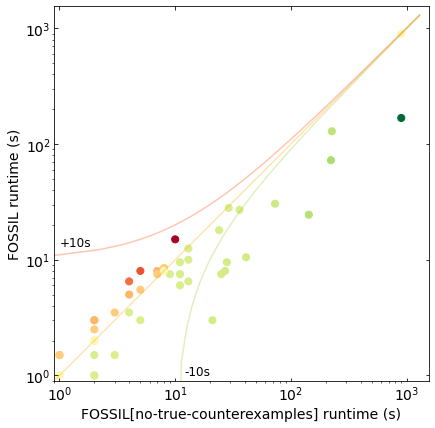

Of the 20 tests which took more than 10 seconds to run with true countermodels turned off,
19 were faster with true countermodels turned on.
Of the 50 tests which took more than -1 seconds to run with true countermodels turned off,
26 were faster with true countermodels turned on.


In [8]:
# Plot
m = max([max(nocex), cex_max])
x = adjust(nocex, mx=m)
y = adjust(cex, mx=m)
pretty_plot(x, y, x_name='FOSSIL[no-true-counterexamples]', tm_val=m+1)
check_bench(x, y)
check_bench(x, y, bench=-1)

## C. No LFP counterexample (lemma proposals)

<Figure size 432x288 with 0 Axes>

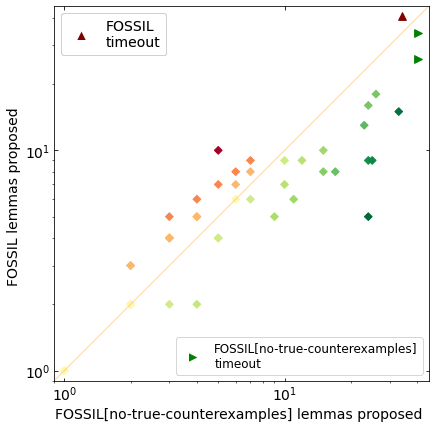

In [9]:
# Plot lemma proposals
cex_prop = [results_cex[name][1] for name in names]
nocex_prop = [results_nocex[name][1] for name in names]
m = max([max(nocex_prop), max(cex_prop)])
x_prop = adjust(nocex_prop, mx=m)
y_prop = adjust(cex_prop, mx=m)
pretty_plot(x_prop, y_prop, x_name='FOSSIL[no-true-counterexamples]', tm_val=m+1, mark='D', y_leg='upper left',
            log=True, square=True, measurement='lemmas proposed', unit=None, bands=False)

<Figure size 432x288 with 0 Axes>

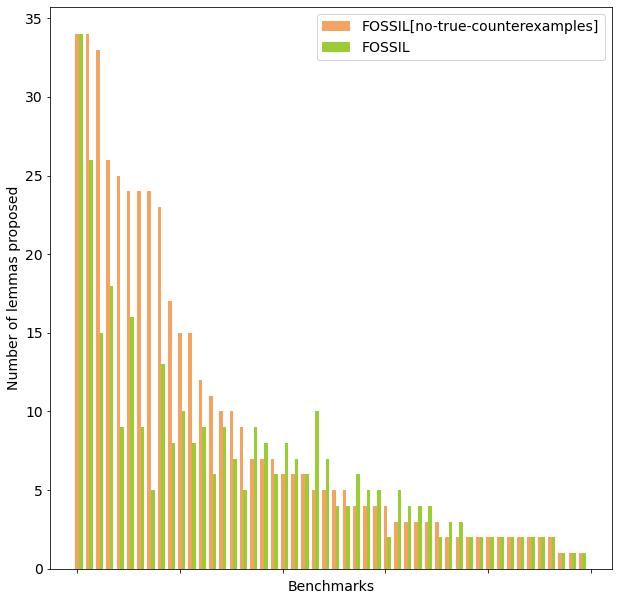

Of the 14 tests which took more than 10 seconds to run with no true counterexamples,
13 were faster with main.
Of the 50 tests which took more than -1 seconds to run with no true counterexamples,
21 were faster with main.


In [10]:
# Alternative plot to above scatterplot for lemmas proposed
plt.rcParams.update({'font.size': 14})

fig = plt.figure()
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
rect_bar = [left, bottom, width, height]

# Start with a rectangular Figure
plt.figure(figsize=(12, 12))
ax = plt.axes(rect_bar)

#y_prop = [yi for _, yi in sorted(zip(x, y_prop), reverse=True)]
#x_prop = [xi for _, xi in sorted(zip(x, x_prop), reverse=True)]
y_prop = [yi for _, yi in sorted(zip(x_prop, y_prop), reverse=True)]
x_prop = sorted(x_prop, reverse=True)

N = len(names)
ind = np.arange(N)  # the x locations for the groups
width = 0.35      #  the width of the bars

rects1 = ax.bar(ind,         x_prop, width, color='sandybrown')
rects2 = ax.bar(ind + width, y_prop, width, color='yellowgreen')

ax.set_ylabel('Number of lemmas proposed')
ax.set_xlabel('Benchmarks')
ax.set_xticklabels([])
ax.set_title('')

ax.legend((rects1[0], rects2[0]), ('FOSSIL[no-true-counterexamples]', 'FOSSIL'))
fig.tight_layout()
plt.savefig('plots/bar_FOSSIL_no-true-counterexamples_-FOSSIL_lemmas-proposed.png',
            bbox_inches = 'tight', pad_inches = 0.2, dpi=100)
plt.show()
check_bench(x_prop, y_prop, first_name='no true counterexamples', second_name='main')
check_bench(x_prop, y_prop, first_name='no true counterexamples', second_name='main', bench=-1)

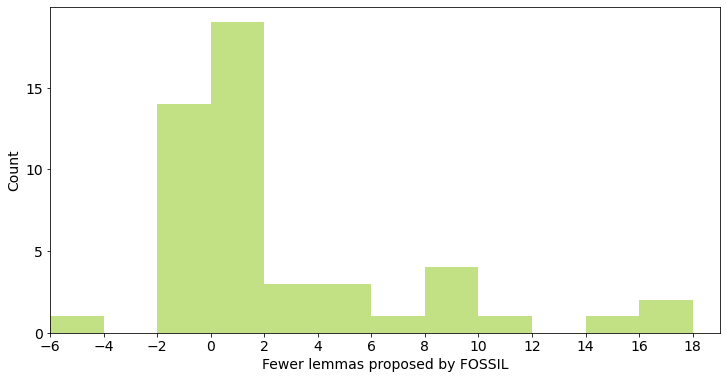

In [11]:
# Alternative plot to above bar plot for lemmas proposed, single relative bars
diff = [x_prop[i] - y_prop[i] for i in range(len(x_prop))]

plt.figure(figsize=(12, 6))
ax = plt.axes()
bins = np.arange(-6,20,2)# + 0.5
ax.hist(diff, bins, facecolor='yellowgreen', alpha=0.6)
ax.set_xticks(range(-6,20,2))
ax.set_xlim([-6, 19])
ax.yaxis.get_major_locator().set_params(integer=True)

ax.set_ylabel('Count')
ax.set_xlabel('Fewer lemmas proposed by FOSSIL')
plt.show()

## D. CVC4Sy (runtimes)

In [12]:
# Process comparison
_, results_cvc4sy = process_done('cvc4sy-new.txt', name_terminate=False)
cvc4sy = [results_cvc4sy[name][0] for name in names]

<Figure size 432x288 with 0 Axes>

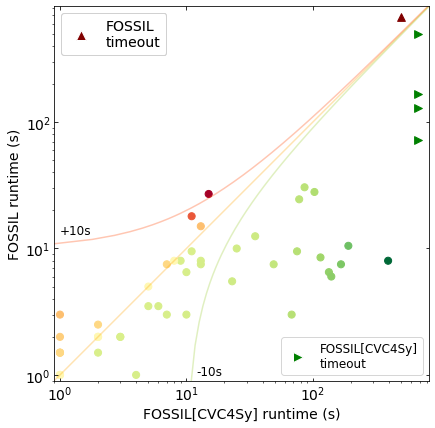

Of the 25 tests which took more than 10 seconds to run with CVC4Sy,
21 were faster with minisy.
Of the 50 tests which took more than -1 seconds to run with CVC4Sy,
31 were faster with minisy.


In [13]:
# Plot
m = 500 #max([max(cvc4sy), cex_max])
x = adjust(cvc4sy, mx=m)
y = adjust(cex, mx=m)
pretty_plot(x, y, x_name='FOSSIL[CVC4Sy]', y_leg='upper left')
check_bench(x, y, first_name='CVC4Sy', second_name='minisy')
check_bench(x, y, first_name='CVC4Sy', second_name='minisy', bench=-1)